In [4]:
import torch
import torchvision
from torchvision import transforms, datasets

In [5]:
train = datasets.MNIST("", train = True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

In [6]:
test = datasets.MNIST("", train = False, download = True, 
                     transform = transforms.Compose([transforms.ToTensor()]))

In [7]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset  = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [8]:
for data in trainset:
    print(data)
    break
    

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
x, y = data[0][0], data[1][0]
print(y)

tensor(5)


In [10]:
import matplotlib.pyplot as plt

In [11]:
#plt.imshow(data[0][0])
print(data[0][0].shape)

torch.Size([1, 28, 28])


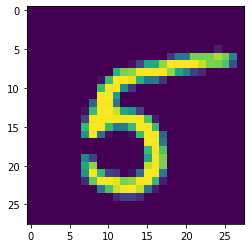

In [12]:
plt.imshow(data[0][0].view(28,28))

In [13]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0 , 5:0 ,6:0 , 7:0, 8:0 , 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] +=1
        total+=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [14]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [15]:
#two libraries are interchangeable, nn is object oriented, and functional allow us just to pass parameters. 
import torch.nn as nn
import torch.nn.functional as F


In [24]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()        
        self.fc1 = nn.Linear(784, 64) #Input:784 is 28*28, from the flattened image, 64 hidden connected neurons
        self.fc2 = nn.Linear(64, 64) #Input: has to input 64, since the output from the first layer was 64
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) #Output 10 neurons for the 10 classes of the MNIST
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #defining data flow        
        x = F.relu(self.fc2(x))
        
        #you can throw logic into this feed forward, like an if statement do this section, else do another. 
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x,dim=1) #dim 1 is similar to axis, what do we want so that the probably dist can sum to 1. 
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [28]:
X = torch.rand((28,28))
X = X.view(-1, 784)

In [29]:
X

tensor([[1.6804e-01, 2.7455e-02, 2.9987e-01, 2.7195e-01, 5.3070e-01, 3.7842e-01,
         1.6335e-02, 1.9211e-01, 6.8206e-01, 7.8282e-01, 3.7915e-01, 7.2305e-01,
         5.8096e-01, 9.9658e-01, 9.7552e-01, 1.8648e-01, 1.3642e-01, 8.9671e-01,
         1.5576e-01, 8.8126e-01, 5.3524e-01, 1.7380e-01, 2.2085e-01, 7.7626e-01,
         8.5268e-01, 1.7933e-01, 9.4559e-01, 1.1181e-01, 9.0027e-01, 7.3760e-01,
         6.9511e-01, 3.3395e-01, 6.4719e-01, 3.5619e-02, 4.5965e-01, 1.3811e-01,
         6.7771e-01, 4.7827e-01, 1.4586e-01, 1.6454e-01, 6.4517e-01, 9.9606e-01,
         2.1842e-01, 3.9828e-01, 5.9989e-01, 8.5978e-01, 4.4493e-01, 3.5752e-01,
         4.3054e-01, 3.9462e-01, 5.7315e-01, 3.9278e-01, 6.6776e-01, 3.8333e-01,
         4.5423e-01, 7.2273e-01, 3.5285e-01, 1.1680e-01, 1.5460e-02, 2.8444e-01,
         4.4087e-01, 3.7739e-01, 7.7771e-01, 8.9361e-01, 9.4929e-02, 5.3396e-01,
         7.3679e-01, 2.5298e-01, 2.8253e-01, 9.4502e-01, 6.7527e-01, 2.9530e-02,
         5.2219e-02, 3.5876e

In [30]:
output = net(X)

In [31]:
output

tensor([[-2.1872, -2.2687, -2.3193, -2.2558, -2.3686, -2.2176, -2.4028, -2.4037,
         -2.2875, -2.3399]], grad_fn=<LogSoftmaxBackward>)

In [33]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001) #learning rate using adam optimizer

EPOCHS = 3 #full passes through our data

for epoch in range(EPOCHS):
    for data in trainset: #data is a batch of featuresets and labels
        X,y = data
        net.zero_grad() #using batches for the gradient
        output = net(X.view(-1, 784))
        loss = F.nll_loss(output, y) #calculate the loss, how wrong were we with our pred
        #one hot vector is [0,1,0, 0] where only one of the values in the vector is 'hot' or 'on', we could use MSE if you have a vector rather than a scalar
        loss.backward() #this provides us with the back prop alg
        optimizer.step() #this adjusts the weights for us
    print(loss)

tensor(0.0513, grad_fn=<NllLossBackward>)
tensor(0.2970, grad_fn=<NllLossBackward>)
tensor(0.2178, grad_fn=<NllLossBackward>)


In [34]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total +=1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.961


In [35]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total +=1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.976


<function matplotlib.pyplot.show(*args, **kw)>

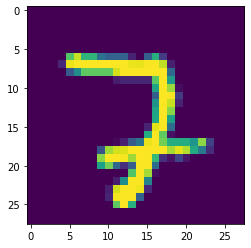

In [45]:
import matplotlib.pyplot as plt
plt.imshow(X[4].view(28,28))
plt.show

In [46]:
print(torch.argmax(net(X[4].view(-1,784))[0]))

tensor(2)
